In [3]:
import torch
import matplotlib.pyplot as plt

In [2]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

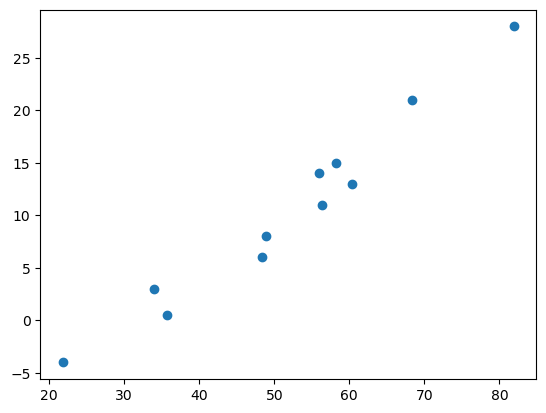

In [6]:
plt.scatter(t_u, t_c);

In [7]:
def model(t_u, w, b):
    return  w * t_u +b

In [11]:
def loss_fn(t_p, t_u):
    sqr_diff = (t_p - t_u)**2
    return sqr_diff.mean()

In [10]:
w = torch.ones(())
b = torch.zeros(())

t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [13]:
loss = loss_fn(t_p, t_c)
loss

tensor(1763.8848)

### Broadcasting

In [25]:
x = torch.ones(())
y = torch.ones(3, 1)
z = torch.ones(1, 3)
a = torch.ones(2, 1, 1)

print(f"shapes: x: {x.shape}, y: {y.shape}")
print(f"        z: {z.shape}, a: {a.shape}")

print("x * y:", (x * y).shape)
print("y * z:", (y * z).shape)
print("y * z * a:", (y * z * a).shape)

shapes: x: torch.Size([]), y: torch.Size([3, 1])
        z: torch.Size([1, 3]), a: torch.Size([2, 1, 1])
x * y: torch.Size([3, 1])
y * z: torch.Size([3, 3])
y * z * a: torch.Size([2, 3, 3])


In [26]:
delta = 0.1

loss_rate_of_change_w = \
    (loss_fn(model(t_u, w + delta, b), t_c) -
     loss_fn(model(t_u, w - delta, b), t_c)) / (2. * delta)

In [32]:
def dloss_fn(t_p, t_c):
    """ derivative of loss_fn ((t_p -  t_c)^2)/t_p.mean() w.r.t. t_p"""
    return 2 * (t_p - t_c) / t_p.size(0)

In [33]:
def dmodel_w(t_u, w, b):
    """ derivative of model (t_u *  w + b) w.r.t. w"""
    return t_u

In [38]:
def dmodel_b(t_u, w, b):
    """ derivative of model (t_u *  w + b) w.r.t. b"""
    return 1.

In [55]:
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dw = dloss_fn(t_p, t_c) * dmodel_w(t_u, w, b)
    dloss_db = dloss_fn(t_p, t_c) * dmodel_b(t_u, w, b)

    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

In [56]:
def training_loop(n_epochs, lr, params, t_u, t_c, print_params=True):

    for epoch in range(1, n_epochs+1):
        w, b = params
        t_p = model(t_u, w, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)

        params = params - lr * grad

        if epoch in {1, 2, 3, 10, 11, 99, 100, 4000, 5000}:  # <3>
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            if print_params:
                print('    Params:', params)
                print('    Grad:  ', grad)
        if epoch in {4, 12, 101}:
            print('...')

        if not torch.isfinite(loss).all():
            break  # <3>
    
    return params

In [57]:
training_loop(100, 1e-2, torch.tensor([1., 0.]), t_u, t_c)

Epoch 1, Loss 1763.884766
    Params: tensor([-44.1730,  -0.8260])
    Grad:   tensor([4517.2964,   82.6000])
Epoch 2, Loss 5802484.500000
    Params: tensor([2568.4011,   45.1637])
    Grad:   tensor([-261257.4062,   -4598.9702])
Epoch 3, Loss 19408029696.000000
    Params: tensor([-148527.7344,   -2616.3931])
    Grad:   tensor([15109614.0000,   266155.6875])
...
Epoch 10, Loss 90901105189019073810297959556841472.000000
    Params: tensor([3.2144e+17, 5.6621e+15])
    Grad:   tensor([-3.2700e+19, -5.7600e+17])
Epoch 11, Loss inf
    Params: tensor([-1.8590e+19, -3.2746e+17])
    Grad:   tensor([1.8912e+21, 3.3313e+19])


tensor([-1.8590e+19, -3.2746e+17])

In [58]:
training_loop(100, 1e-4, torch.tensor([1., 0.]), t_u, t_c)

Epoch 1, Loss 1763.884766
    Params: tensor([ 0.5483, -0.0083])
    Grad:   tensor([4517.2964,   82.6000])
Epoch 2, Loss 323.090515
    Params: tensor([ 0.3623, -0.0118])
    Grad:   tensor([1859.5493,   35.7843])
Epoch 3, Loss 78.929634
    Params: tensor([ 0.2858, -0.0135])
    Grad:   tensor([765.4666,  16.5122])
...
Epoch 10, Loss 29.105247
    Params: tensor([ 0.2324, -0.0166])
    Grad:   tensor([1.4803, 3.0544])
Epoch 11, Loss 29.104168
    Params: tensor([ 0.2323, -0.0169])
    Grad:   tensor([0.5781, 3.0384])
...
Epoch 99, Loss 29.023582
    Params: tensor([ 0.2327, -0.0435])
    Grad:   tensor([-0.0533,  3.0226])
Epoch 100, Loss 29.022667
    Params: tensor([ 0.2327, -0.0438])
    Grad:   tensor([-0.0532,  3.0226])


tensor([ 0.2327, -0.0438])

In [59]:
t_un = 0.1 * t_u

In [61]:
training_loop(n_epochs = 100,
    lr = 1e-2,
    params = torch.tensor([1.0, 0.0]),
    t_u = t_un,                  
    t_c = t_c)

Epoch 1, Loss 80.364342
    Params: tensor([1.7761, 0.1064])
    Grad:   tensor([-77.6140, -10.6400])
Epoch 2, Loss 37.574913
    Params: tensor([2.0848, 0.1303])
    Grad:   tensor([-30.8623,  -2.3864])
Epoch 3, Loss 30.871077
    Params: tensor([2.2094, 0.1217])
    Grad:   tensor([-12.4631,   0.8587])
...
Epoch 10, Loss 29.030489
    Params: tensor([ 2.3232, -0.0710])
    Grad:   tensor([-0.5355,  2.9295])
Epoch 11, Loss 28.941877
    Params: tensor([ 2.3284, -0.1003])
    Grad:   tensor([-0.5240,  2.9264])
...
Epoch 99, Loss 22.214186
    Params: tensor([ 2.7508, -2.4910])
    Grad:   tensor([-0.4453,  2.5208])
Epoch 100, Loss 22.148710
    Params: tensor([ 2.7553, -2.5162])
    Grad:   tensor([-0.4446,  2.5165])


tensor([ 2.7553, -2.5162])

In [66]:
params  = training_loop(
    5000,
    1e-2,
    torch.tensor([1., 0.]),
    t_un,
    t_c,
    False)

params

Epoch 1, Loss 80.364342
Epoch 2, Loss 37.574913
Epoch 3, Loss 30.871077
...
Epoch 10, Loss 29.030489
Epoch 11, Loss 28.941877
...
Epoch 99, Loss 22.214186
Epoch 100, Loss 22.148710
...
Epoch 4000, Loss 2.927680
Epoch 5000, Loss 2.927648


tensor([  5.3671, -17.3012])

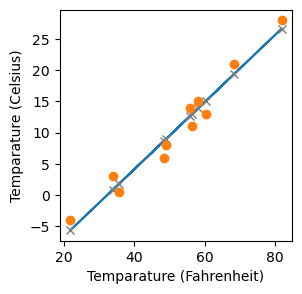

In [79]:
t_p = model(t_un, *params)

fig = plt.figure(figsize=(3,3))
plt.xlabel('Temparature (Fahrenheit)')
plt.ylabel('Temparature (Celsius)')
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_p.detach().numpy(), 'x', color='grey')
plt.plot(t_u.numpy(), t_c.numpy(), 'o');

### Autograd

In [82]:
params = torch.tensor([1., 0.], requires_grad=True)
params.grad is None

True

In [85]:
loss = loss_fn(model(t_u, *params), t_c)
loss.backward()

params.grad

tensor([4517.2969,   82.6000])

In [103]:
def training_loop(n_epochs, lr, params, t_u, t_c):
    for epoch in range(1, n_epochs+1):
        if params.grad is not None:
            params.grad.zero_()
        
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        loss.backward()

        with torch.no_grad():
            params -= lr * params.grad

        if epoch % 500 == 0:
            print(f'Epoch:{epoch} \t Loss: {loss:.3f}')
        
    return params

In [104]:
training_loop(
    n_epochs = 5000,
    lr = 1e-2,
    params = torch.tensor([1.0, 0.0], requires_grad=True),  
    t_u = t_un,                                             
    t_c = t_c)

Epoch:500 	 Loss: 7.860
Epoch:1000 	 Loss: 3.829
Epoch:1500 	 Loss: 3.092
Epoch:2000 	 Loss: 2.958
Epoch:2500 	 Loss: 2.933
Epoch:3000 	 Loss: 2.929
Epoch:3500 	 Loss: 2.928
Epoch:4000 	 Loss: 2.928
Epoch:4500 	 Loss: 2.928
Epoch:5000 	 Loss: 2.928


tensor([  5.3671, -17.3012], requires_grad=True)

In [112]:
import torch.optim as optim

dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

In [113]:
params = torch.tensor([1., 0.], requires_grad=True)
lr=1e-5

optimizer = optim.SGD([params], lr=lr)

In [115]:
t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)

optimizer.zero_grad()
loss.backward()
optimizer.step()

params

tensor([ 0.9123, -0.0016], requires_grad=True)

In [118]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs+1):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print(f'Epoch: {epoch} Loss: {loss}')
    return params

params = torch.tensor([1., 0.], requires_grad=True)
lr=1e-5
optimizer = optim.SGD([params], lr)

training_loop(5000, optimizer, params, t_un, t_c)

Epoch: 500 Loss: 57.37331771850586
Epoch: 1000 Loss: 44.78495788574219
Epoch: 1500 Loss: 37.90142059326172
Epoch: 2000 Loss: 34.128047943115234
Epoch: 2500 Loss: 32.05025100708008
Epoch: 3000 Loss: 30.896940231323242
Epoch: 3500 Loss: 30.24767303466797
Epoch: 4000 Loss: 29.87321662902832
Epoch: 4500 Loss: 29.648618698120117
Epoch: 5000 Loss: 29.505748748779297


tensor([2.2361, 0.0655], requires_grad=True)

In [119]:
params = torch.tensor([1., 0.,], requires_grad=True)
adam_optim = optim.Adam([params], lr=1e-1)

training_loop(5000, adam_optim, params, t_u, t_c)

Epoch: 500 Loss: 7.6128997802734375
Epoch: 1000 Loss: 3.086698293685913
Epoch: 1500 Loss: 2.9285776615142822
Epoch: 2000 Loss: 2.9276463985443115
Epoch: 2500 Loss: 2.927645206451416
Epoch: 3000 Loss: 2.9276459217071533
Epoch: 3500 Loss: 2.927644968032837
Epoch: 4000 Loss: 2.927645683288574
Epoch: 4500 Loss: 2.9276463985443115
Epoch: 5000 Loss: 2.927645206451416


tensor([  0.5368, -17.3048], requires_grad=True)

### Splitting data

In [127]:
n_samples = t_u.size(0)
n_val = int(0.2 * n_samples)

shuffle = torch.randperm(n_samples)

train_idx = shuffle[:-n_val]
val_idx = shuffle[-n_val:]

train_idx, val_idx


(tensor([ 3, 10,  5,  0,  1,  9,  2,  7,  6]), tensor([4, 8]))

In [129]:
train_t_u = t_u[train_idx]
train_t_c = t_c[train_idx]

val_t_u = t_u[val_idx]
val_t_c = t_c[val_idx]

train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

In [133]:
def training_loop(n_epochs, optimizer, params, train_tu, val_tu, train_tc, val_tc):
    for epoch in range(1, n_epochs+1):
        train_tp = model(train_tu, *params)
        train_loss = loss_fn(train_tp, train_tc)

        val_tp = model(val_tu, *params)
        val_loss = loss_fn(val_tp, val_tc)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if epoch <=3 or epoch % 500 == 0:
            print(f'Epoch: {epoch} \t Train Loss: {train_loss:.3f} \t Val Loss: {val_loss:.3f}')
    
    return params

In [136]:
params = torch.tensor([1., 0.,], requires_grad=True)
lr = 1e-1
optimizer = optim.Adam([params], lr)

training_loop(5000, optimizer, params, train_t_un, val_t_un, train_t_c, val_t_c)

Epoch: 1 	 Train Loss: 94.869 	 Val Loss: 15.091
Epoch: 2 	 Train Loss: 85.436 	 Val Loss: 11.244
Epoch: 3 	 Train Loss: 76.852 	 Val Loss: 8.186
Epoch: 500 	 Train Loss: 2.141 	 Val Loss: 8.265
Epoch: 1000 	 Train Loss: 2.115 	 Val Loss: 8.014
Epoch: 1500 	 Train Loss: 2.115 	 Val Loss: 8.014
Epoch: 2000 	 Train Loss: 2.115 	 Val Loss: 8.014
Epoch: 2500 	 Train Loss: 2.115 	 Val Loss: 8.014
Epoch: 3000 	 Train Loss: 2.115 	 Val Loss: 8.014
Epoch: 3500 	 Train Loss: 2.115 	 Val Loss: 8.014
Epoch: 4000 	 Train Loss: 2.115 	 Val Loss: 8.014
Epoch: 4500 	 Train Loss: 2.115 	 Val Loss: 8.014
Epoch: 5000 	 Train Loss: 2.115 	 Val Loss: 8.014


tensor([  5.3680, -16.7963], requires_grad=True)